In [59]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from env import get_db_url

### Use the ```iris``` database to answer the following quesitons:

In [10]:
url_iris = get_db_url('iris_db')
sql_iris = '''
SELECT species_name, sepal_length, sepal_width, petal_length, petal_width
FROM species
JOIN measurements USING(species_id)
'''
iris = pd.read_sql(sql_iris, url_iris)
iris.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


<font color='magenta'>*Class solution -> using ```iris``` database from ```seaborn``` library or from ```pydataset```*</font>

In [15]:
iris1 = sns.load_dataset('iris')

In [16]:
iris2 = data('iris')

In [18]:
iris1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**1. What does the distribution of petal lengths look like?**

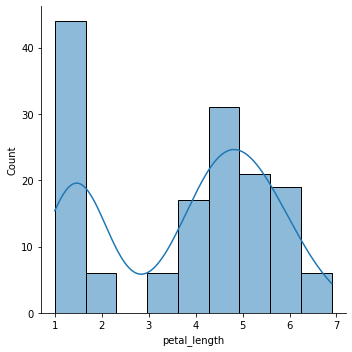

In [18]:
sns.displot(data = iris, x = 'petal_length', kde = True);

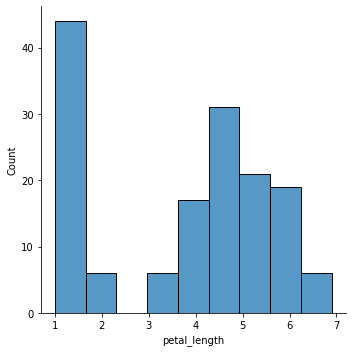

In [20]:
#class solution
sns.displot(iris1.petal_length);

**2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.**

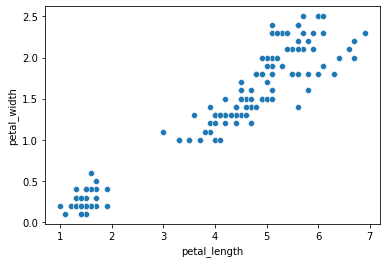

In [19]:
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width');
# yes. positive correlation

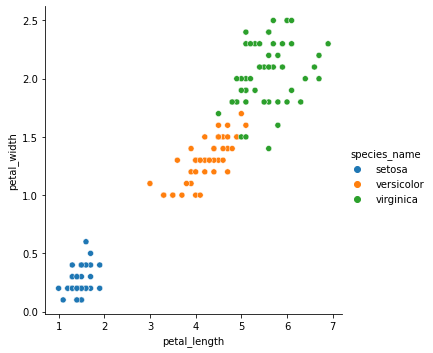

In [22]:
#class solutions
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species_name');

In [20]:
#created a correlation matrix to confirm a positive correlation
pd.DataFrame(np.corrcoef(iris.petal_length, iris.petal_width), 
             index=['petal_length', 'petal_width'], columns=['petal_length', 'petal_width'])

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


**3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.**

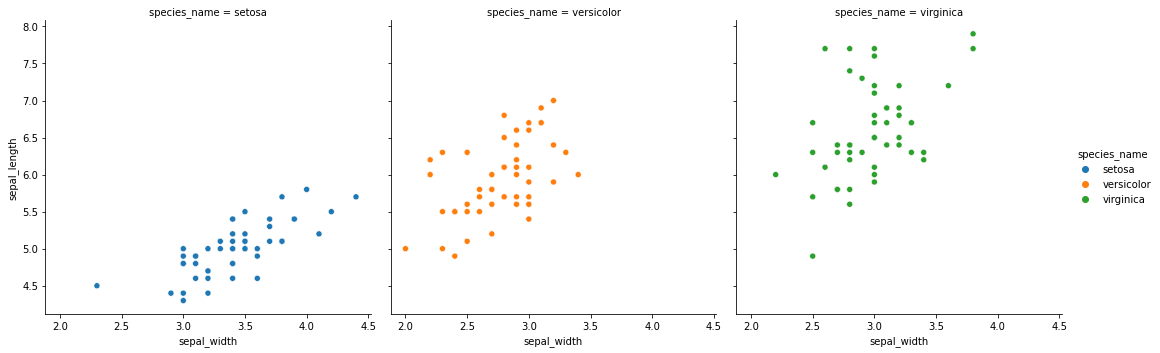

In [21]:
sns.relplot(data = iris, x = 'sepal_width',
            y = 'sepal_length',
            col = 'species_name',
            hue = 'species_name');

* *Setosa* width > 3.0, length < 6.0
* *Versicolor* width < 3.5, 5 < length < 7
* *Virginica*width is more spread, but the length mostly is > 5.5

The do overlap each other so, there is a pattern but it is hard to predict the species based on the sepal width and length

<font color='magenta'>*Class solution*</font>

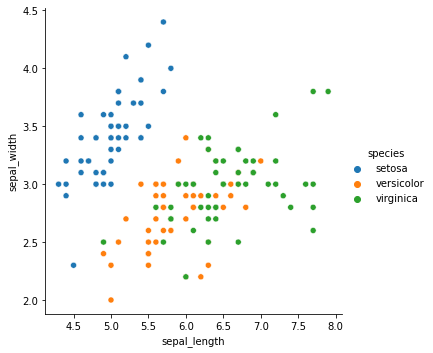

In [26]:
sns.relplot(data = iris1, x = 'sepal_length', y = 'sepal_width', hue = 'species');

**4. Which features would be best used to predict species?**

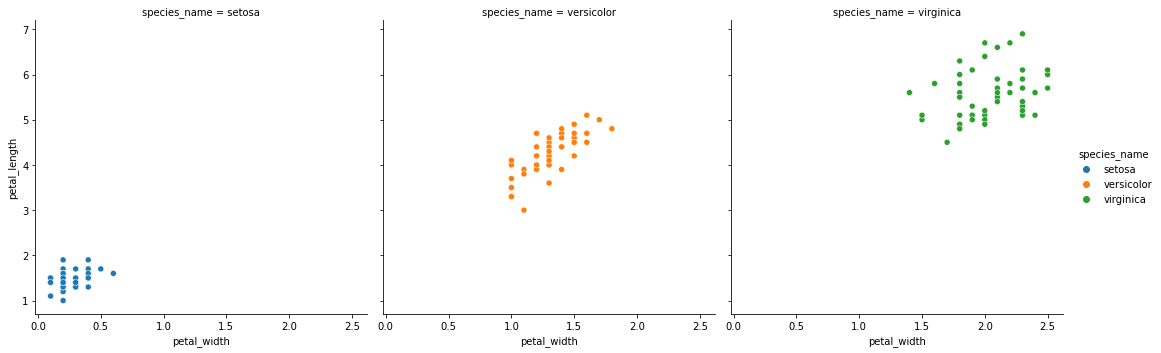

In [22]:
sns.relplot(data = iris, x = 'petal_width',
            y = 'petal_length',
            col = 'species_name',
            hue = 'species_name');

*Petal length and petal width definitely show better clustering that can be used to predict species*

<font color='magenta'>***Class solution***</font>

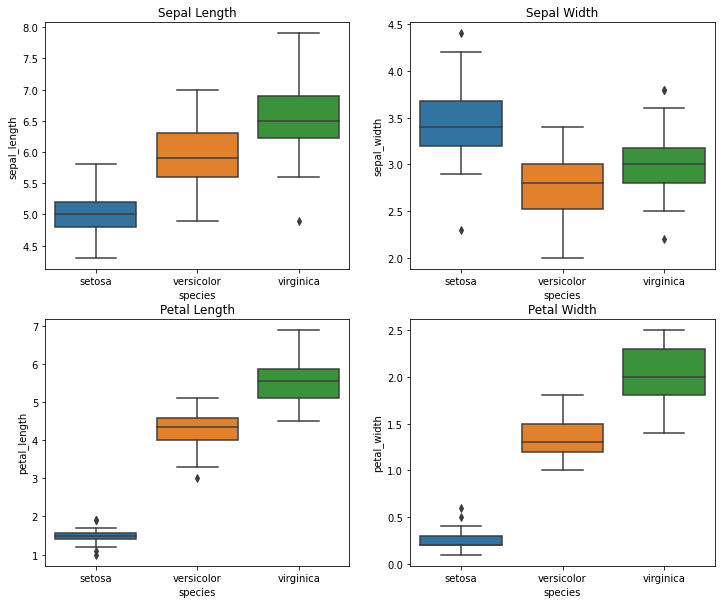

In [28]:
# Which features would be best used to predict species?

plt.figure(figsize=(12, 10))

plt.subplot(221)
sns.boxplot(y = 'sepal_length', x = 'species', data = iris1)
plt.title('Sepal Length')

plt.subplot(222)
sns.boxplot(y = 'sepal_width', x = 'species', data = iris1)
plt.title('Sepal Width')

plt.subplot(223)
sns.boxplot(y = 'petal_length', x = 'species', data = iris1)
plt.title('Petal Length')

plt.subplot(224)
sns.boxplot(y = 'petal_width', x = 'species', data = iris1)
plt.title('Petal Width')

plt.show()

<font color='magenta'>***Class solution #2 using ```pairplot```***</font>

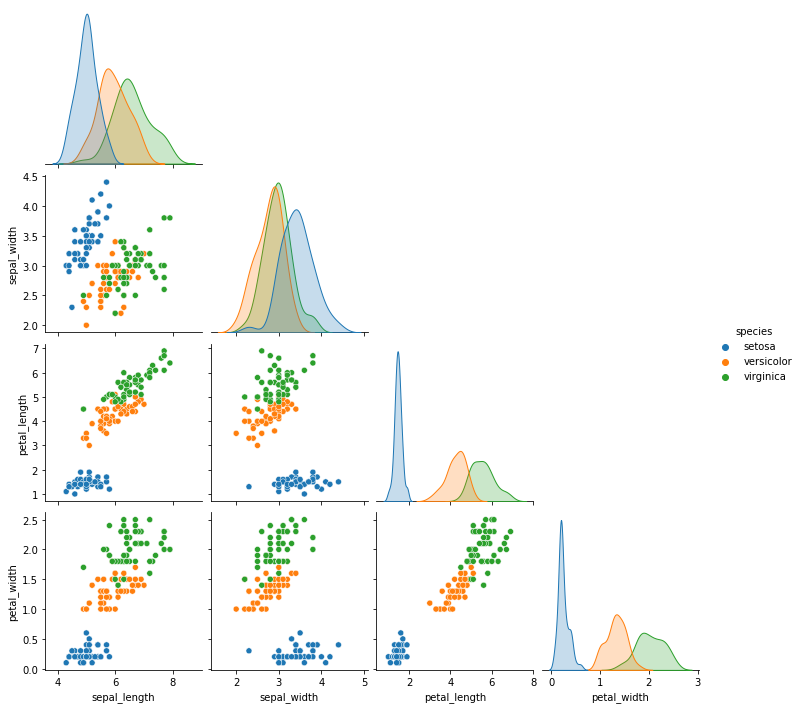

In [31]:
sns.pairplot(data = iris1, hue = 'species', corner = True);

### Part II

**1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?**

In [29]:
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [25]:
ans.dataset.unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [32]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [38]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

* **Plot the x and y values from the anscombe data. Each dataset should be in a separate column.**

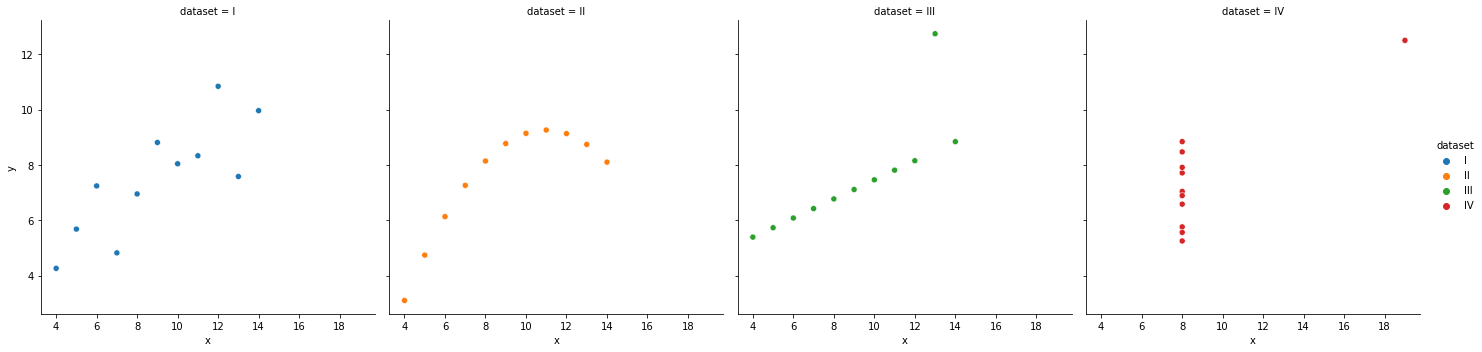

In [35]:
sns.relplot(data = ans, x = 'x',
            y = 'y',
            col = 'dataset',
            hue = 'dataset');

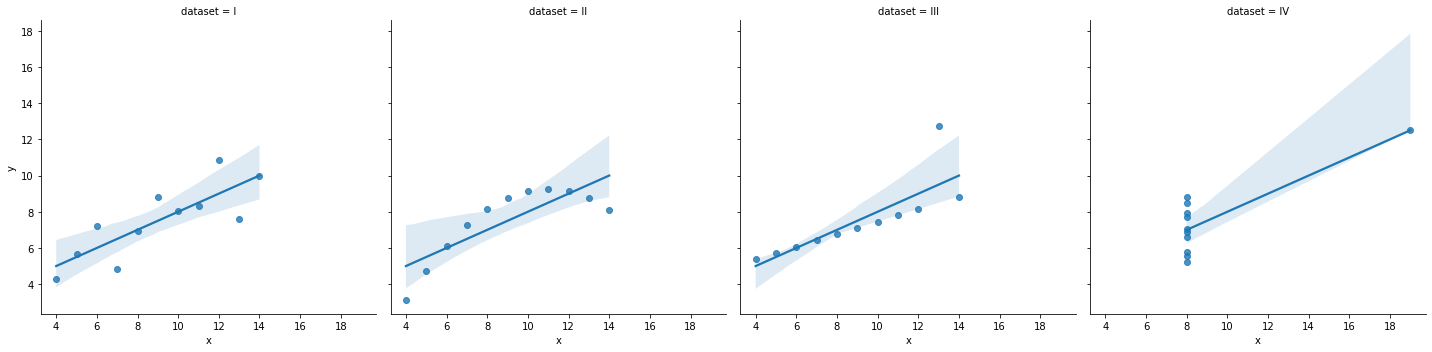

In [159]:
# class solution
sns.lmplot(data = ans, x = 'x',
            y = 'y',
            col = 'dataset');

**2. Load the ```InsectSprays``` dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.**

In [38]:
ins = data('InsectSprays')
ins.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [39]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [40]:
ins.spray.nunique()

6

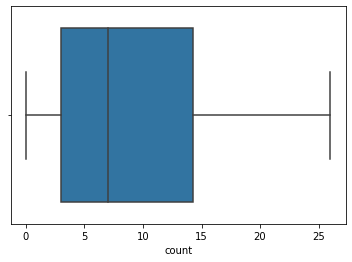

In [41]:
sns.boxplot(data = ins, x = 'count');

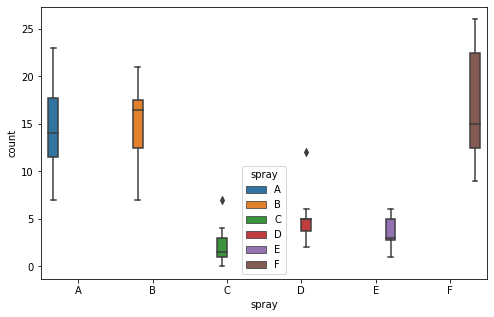

In [44]:
plt.figure(figsize = (8, 5))
sns.boxplot(data = ins, y = 'count', x = 'spray', hue = 'spray');

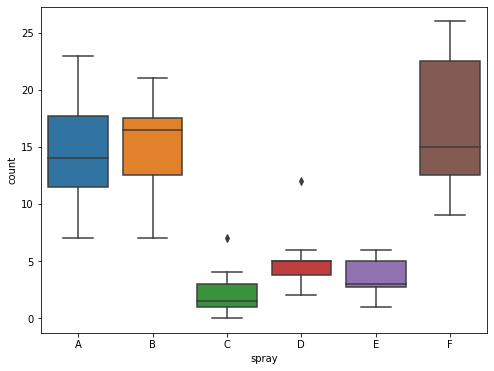

In [165]:
# class solution 

plt.figure(figsize = (8, 6))
sns.boxplot(data = ins, y = 'count', x = 'spray');

**3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:**

In [49]:
swiss = data('swiss')
swiss.head(1)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2


In [46]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [47]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


* *Create an attribute named ```is_catholic``` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)*

In [66]:
#swiss.Catholic >= 80.0

In [50]:
swiss['is_catholic'] = swiss.Catholic >= 80.0

In [51]:
swiss.head(1)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False


* Does whether or not a province is Catholic influence fertility?

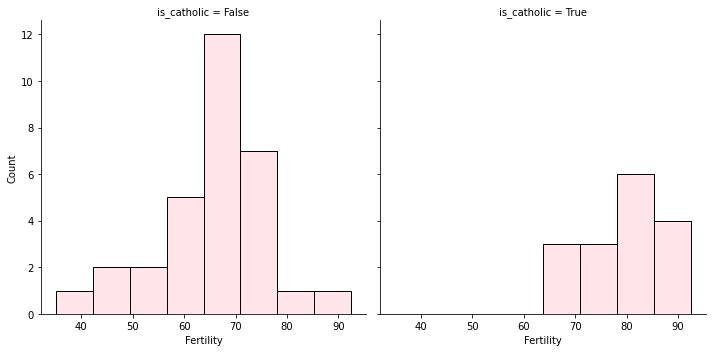

In [76]:
sns.displot(data = swiss, x = 'Fertility', col = 'is_catholic', color = 'pink', alpha = 0.4);

<font color='magenta'>***Class solution***</font>

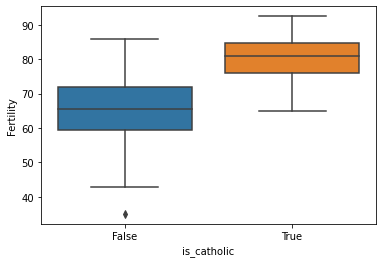

In [53]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss);

* What measure correlates most strongly with fertility?

In [55]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


<AxesSubplot:title={'center':'fertility vs education'}, xlabel='Catholic', ylabel='Fertility'>

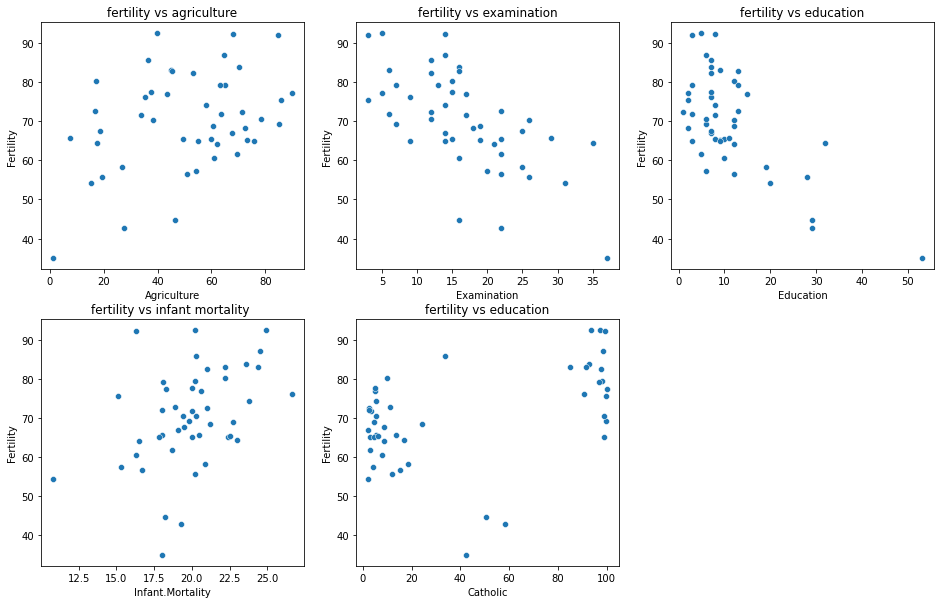

In [168]:
#create subplots with scatterplots to see if there are relations between varisbles and fertility level
plt.figure(figsize = (16, 10))

# fertility vs agricalture
plt.subplot(231)
plt.title('fertility vs agriculture')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Agriculture')

# fertility vs examination
plt.subplot(232)
plt.title('fertility vs examination')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Examination')

# fertility vs education
plt.subplot(233)
plt.title('fertility vs education')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Education')

# fertility vs infant mortality
plt.subplot(234)
plt.title('fertility vs infant mortality ')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Infant.Mortality')

# fertility vs education
plt.subplot(235)
plt.title('fertility vs education')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Catholic')

Based on the scatter plots **there is a strong negative correlation between fertility and education, fertility and examination**

In [98]:
pd.DataFrame(np.corrcoef(swiss.Fertility, swiss.Education), 
             index=['fertility', 'education'], columns=['fertility', 'education'])

,fertility,education
fertility,1.000000,-0.663789
education,-0.663789,1.000000


In [66]:
pd.DataFrame(np.corrcoef(swiss.Fertility, swiss.Examination), 
             index=['fertility', 'examination'], columns=['fertility', 'examination'])

,fertility,examination
fertility,1.000000,-0.645883
examination,-0.645883,1.000000


In [67]:
pd.DataFrame(np.corrcoef(swiss.Fertility, swiss.Catholic), 
             index=['fertility', 'is_catholic'], columns=['fertility', 'is_catholic'])

,fertility,is_catholic
fertility,1.000000,0.463685
is_catholic,0.463685,1.000000


<font color='magenta'>***Class solution***</font>

In [62]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


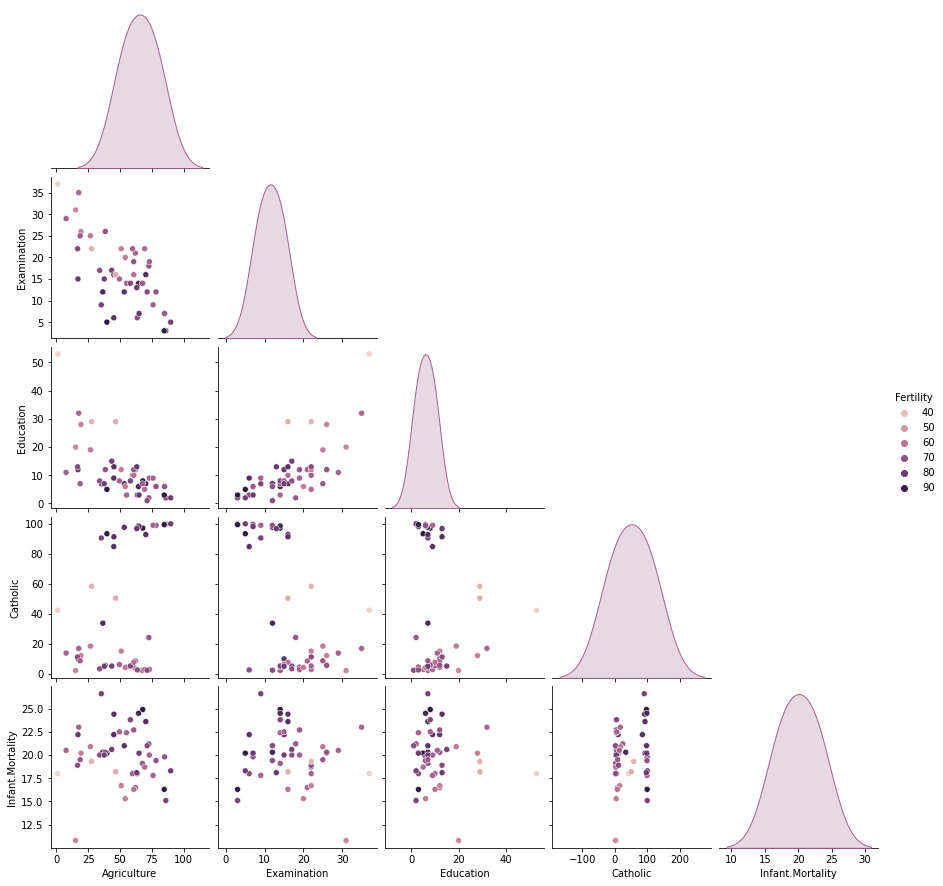

In [65]:
#class solution (commented) didn't work with my data. I had to slice and remove is_catholis from the pairplot
#sns.pairplot(data = swiss, corner = True, hue = 'Fertility')
sns.pairplot(data = swiss.iloc[:, :6], hue = 'Fertility', corner = True);

In [167]:
#class count for correlation
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.605023
Name: Fertility, dtype: float64

**4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.**

In [68]:
url_c = get_db_url('chipotle')

In [69]:
chipotle = pd.read_sql('SELECT * FROM orders', url_c)

In [70]:
# change the item price type to float
chipotle['item_price'] = chipotle.item_price.str.strip('$').str.replace(',', '').astype(float)

In [71]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [72]:
chipotle_stat = chipotle.groupby('item_name').sum().sort_values('quantity', ascending = False).head(4).reset_index()

In [73]:
chipotle_stat

,item_name,id,order_id,quantity,item_price
0,Chicken Bowl,1780635,713926,761,7342.73
1,Chicken Burrito,1238770,497303,591,5575.82
2,Chips and Guacamole,1122252,449959,506,2201.04
3,Steak Burrito,818163,328437,386,3851.43


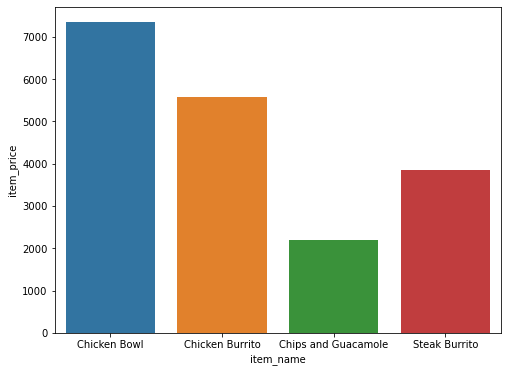

In [75]:
plt.figure(figsize = (8, 6))
sns.barplot(data = chipotle_stat, x = 'item_name', y = 'item_price');

<font color='magenta'>***Class solution***</font>

In [86]:
orders = pd.read_sql('SELECT * FROM orders', url_c)

In [87]:
# Convert the item_price column into a float
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')

/var/folders/1h/vmdz8n3d00lfsp1hw8300jt00000gn/T/ipykernel_1975/929225920.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')


In [82]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [89]:
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [97]:
# revenue produced by 4 highest selling items.

revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue.reset_index()

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


In [91]:
orders.groupby('item_name').item_price.sum().reset_index().head()

,item_name,item_price
0,6 Pack Soft Drink,356.95
1,Barbacoa Bowl,672.36
2,Barbacoa Burrito,894.75
3,Barbacoa Crispy Tacos,120.21
4,Barbacoa Salad Bowl,106.40


In [92]:
best_sellers.reset_index().merge(orders.groupby('item_name').item_price.sum().reset_index(), on='item_name')

,item_name,quantity,item_price
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


In [99]:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


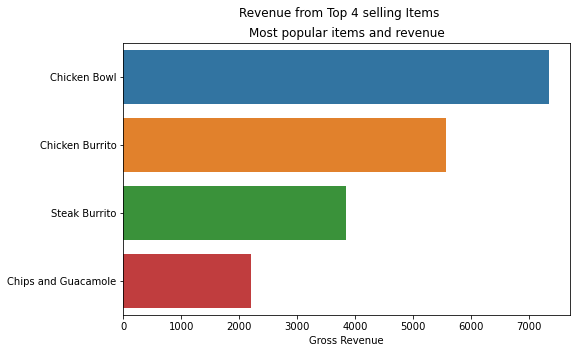

In [100]:
plt.figure(figsize = (8, 5))
sns.barplot(y = 'item_name', x = 'item_price', data = revenue)
plt.title('Most popular items and revenue')

plt.ylabel("") # to get remove the column_name
plt.xlabel("Gross Revenue")
plt.suptitle("Revenue from Top 4 selling Items")

plt.show()

**5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.**

In [145]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [147]:
sleep.Subject.nunique()

18

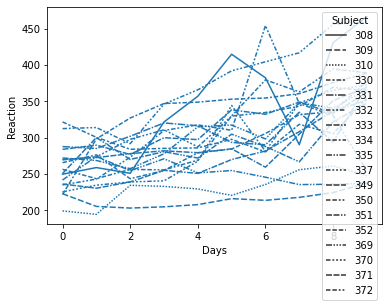

In [153]:
sns.lineplot(data = sleep, x = 'Days', y='Reaction', style = 'Subject');

<font color='magenta'>***Class solution***</font>

In [101]:
sleepstudy = data('sleepstudy')
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str) 

In [102]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,Subject_308
2,258.7047,1,Subject_308
3,250.8006,2,Subject_308
4,321.4398,3,Subject_308
5,356.8519,4,Subject_308


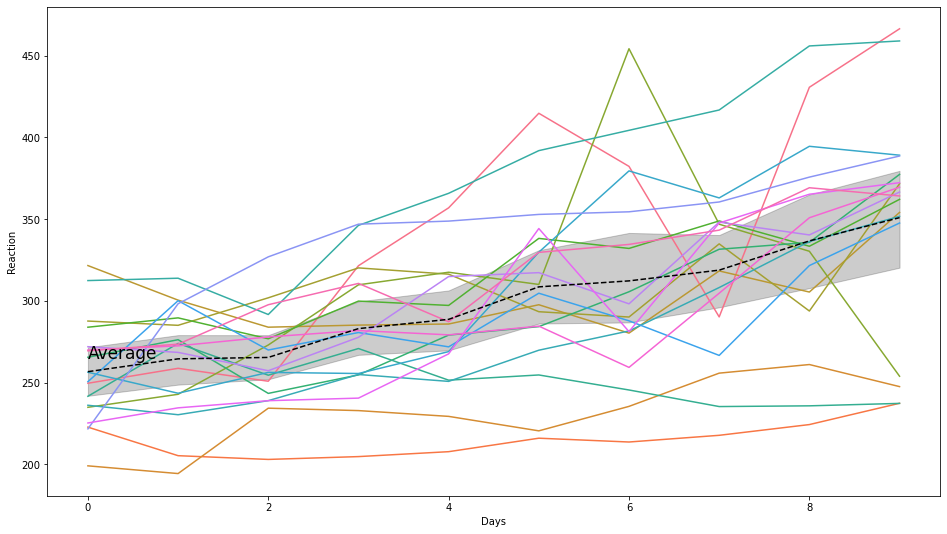

In [103]:
plt.figure(figsize=(16, 9))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', legend=False)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', linestyle='--', estimator = 'mean')
plt.annotate('Average',(0,265),fontsize=17)

plt.show()